The very first and the simplest neural network model was known as Perceptron, which was designed by Rosenblatt in 1977. Perceptron was inspired by the human nervous system. The working mechanism of perceptron is very similar to that of logistic regression.

## Logistic Regression vs Perceptron

Logistic regression is a binary classification algorithm that uses a linear function followed by a logistic/sigmoid activation function to estimate the probability of belonging to a particular class.

A perceptron is a basic building block of a neural network. It takes a set of input features, applies weights to them, and produces an output using a step function.


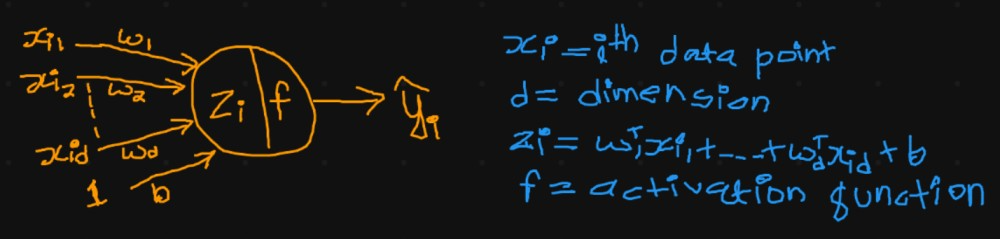

The above diagram is the generalization of both perceptron and logistic regression together. In both the cases (Perceptron and Logistic Regression) the weighted sum of the input features, along with the bias term, is passed through a activation function to produce the predicted output. The only difference between Perceptron and Logistic Regression is the activation function.

For logistic regression:
    $f(z_i) = \frac{1}{1 + e^{-z_i}}$

For Perceptron:
$f(z_i) = \begin{cases}
    1, & \text{if } z_i > 0 \\
    0, & \text{otherwise}
\end{cases}$

In [1]:
import numpy as np

class Preceptron:
    def __init__(self, num_features):
        self.num_features = num_features
        self.weights = np.zeros(num_features)
        self.bias = 0
        self.act_function = lambda x : 1 if x>= 0  else 0

    def predict(self, X):
        zi = np.dot(self.weights, X) + self.bias
        return self.act_function(zi)
        

In [2]:
# Create a perceptron with 2 input features and using the step function as the activation function
perceptron = Preceptron(2)

# Set the weights and bias
perceptron.weights = np.array([0.5, -0.5])
perceptron.bias = 0.2

# Make predictions
x = np.array([0.3, -0.7])
prediction = perceptron.predict(x)
print("Perceptron prediction:", prediction)

Perceptron prediction: 1


## Multi-Layer Perceptron

MLP (aka feedforward neural network) is an extension of the perceptron, where multiple layers of neurons are stacked together. It consists of an input layer, one or more hidden layers, and an output layer. Each neuron in a layer is connected to all neurons in the adjacent layers. The hidden layers enable the model to learn more complex representations of the input data.

The architecture of MLP can be represented as follows:

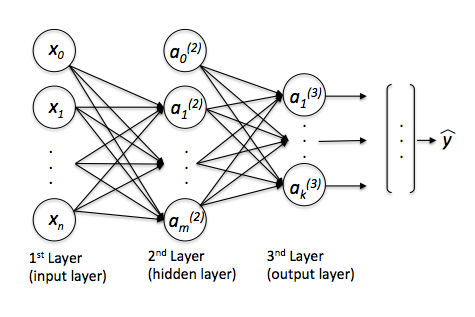

## Activation Functions

An activation function introduces non-linearity into the network, enabling it to learn complex relationships between inputs and outputs. Commonly used activation functions include:

**Sigmoid:** It squashes the weighted sum into the range [0, 1].

$Sigmoid(x) = \frac{1}{1 + e^{-x}}$

**Tanh:** Similar to sigmoid, but squashes the weighted sum into the range [-1, 1].

$Tanh(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}}$

**ReLU (Rectified Linear Unit):** Sets negative values to 0 and keeps positive values as they are.

$ReLU(x) = max(0, x)$

**Leaky ReLU:** Similar to ReLU, but allows a small negative value for negative inputs.

$Leaky-ReLU(x) = max(0.01*x, x)$

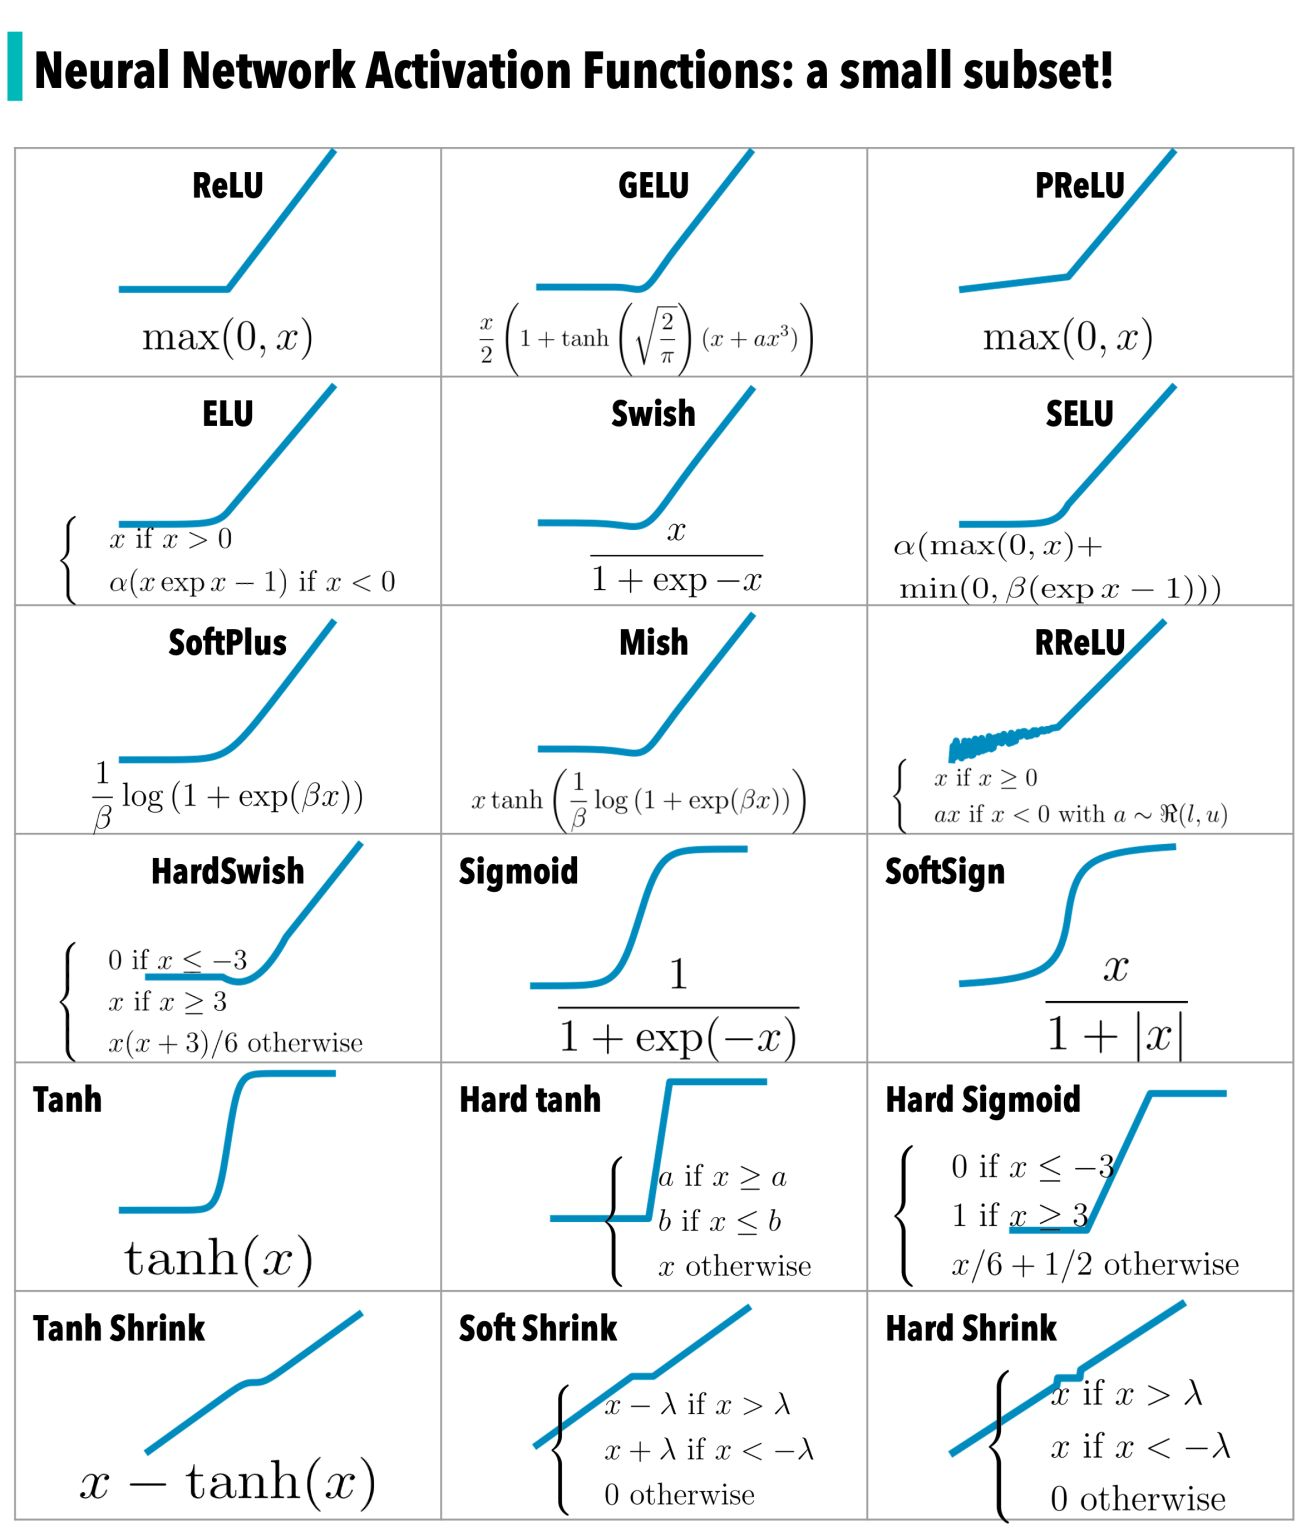

## Forward Propagation

Forward propagation is the process of computing the output of an MLP given an input. Each neuron takes the weighted sum of its inputs, adds a bias term, and applies an activation function to produce the output.

The forward propagation equations for an MLP with one hidden layer can be represented as follows:

```scss
z1 = activation_function(W1 * x + b1)
z2 = activation_function(W2 * z1 + b2)
...
output = activation_function(W_output * z_last_hidden + b_output)
```

where:

- `x` is the input vector,
- `W1, W2, ..., W_output` are the weight matrices for each layer,
- `b1, b2, ..., b_output` are the bias vectors for each layer,
- `z1, z2, ..., z_last_hidden` are the outputs of each hidden layer, and
- `output` is the final output of the MLP.

## Backward Propagation


<div align="center">
<p>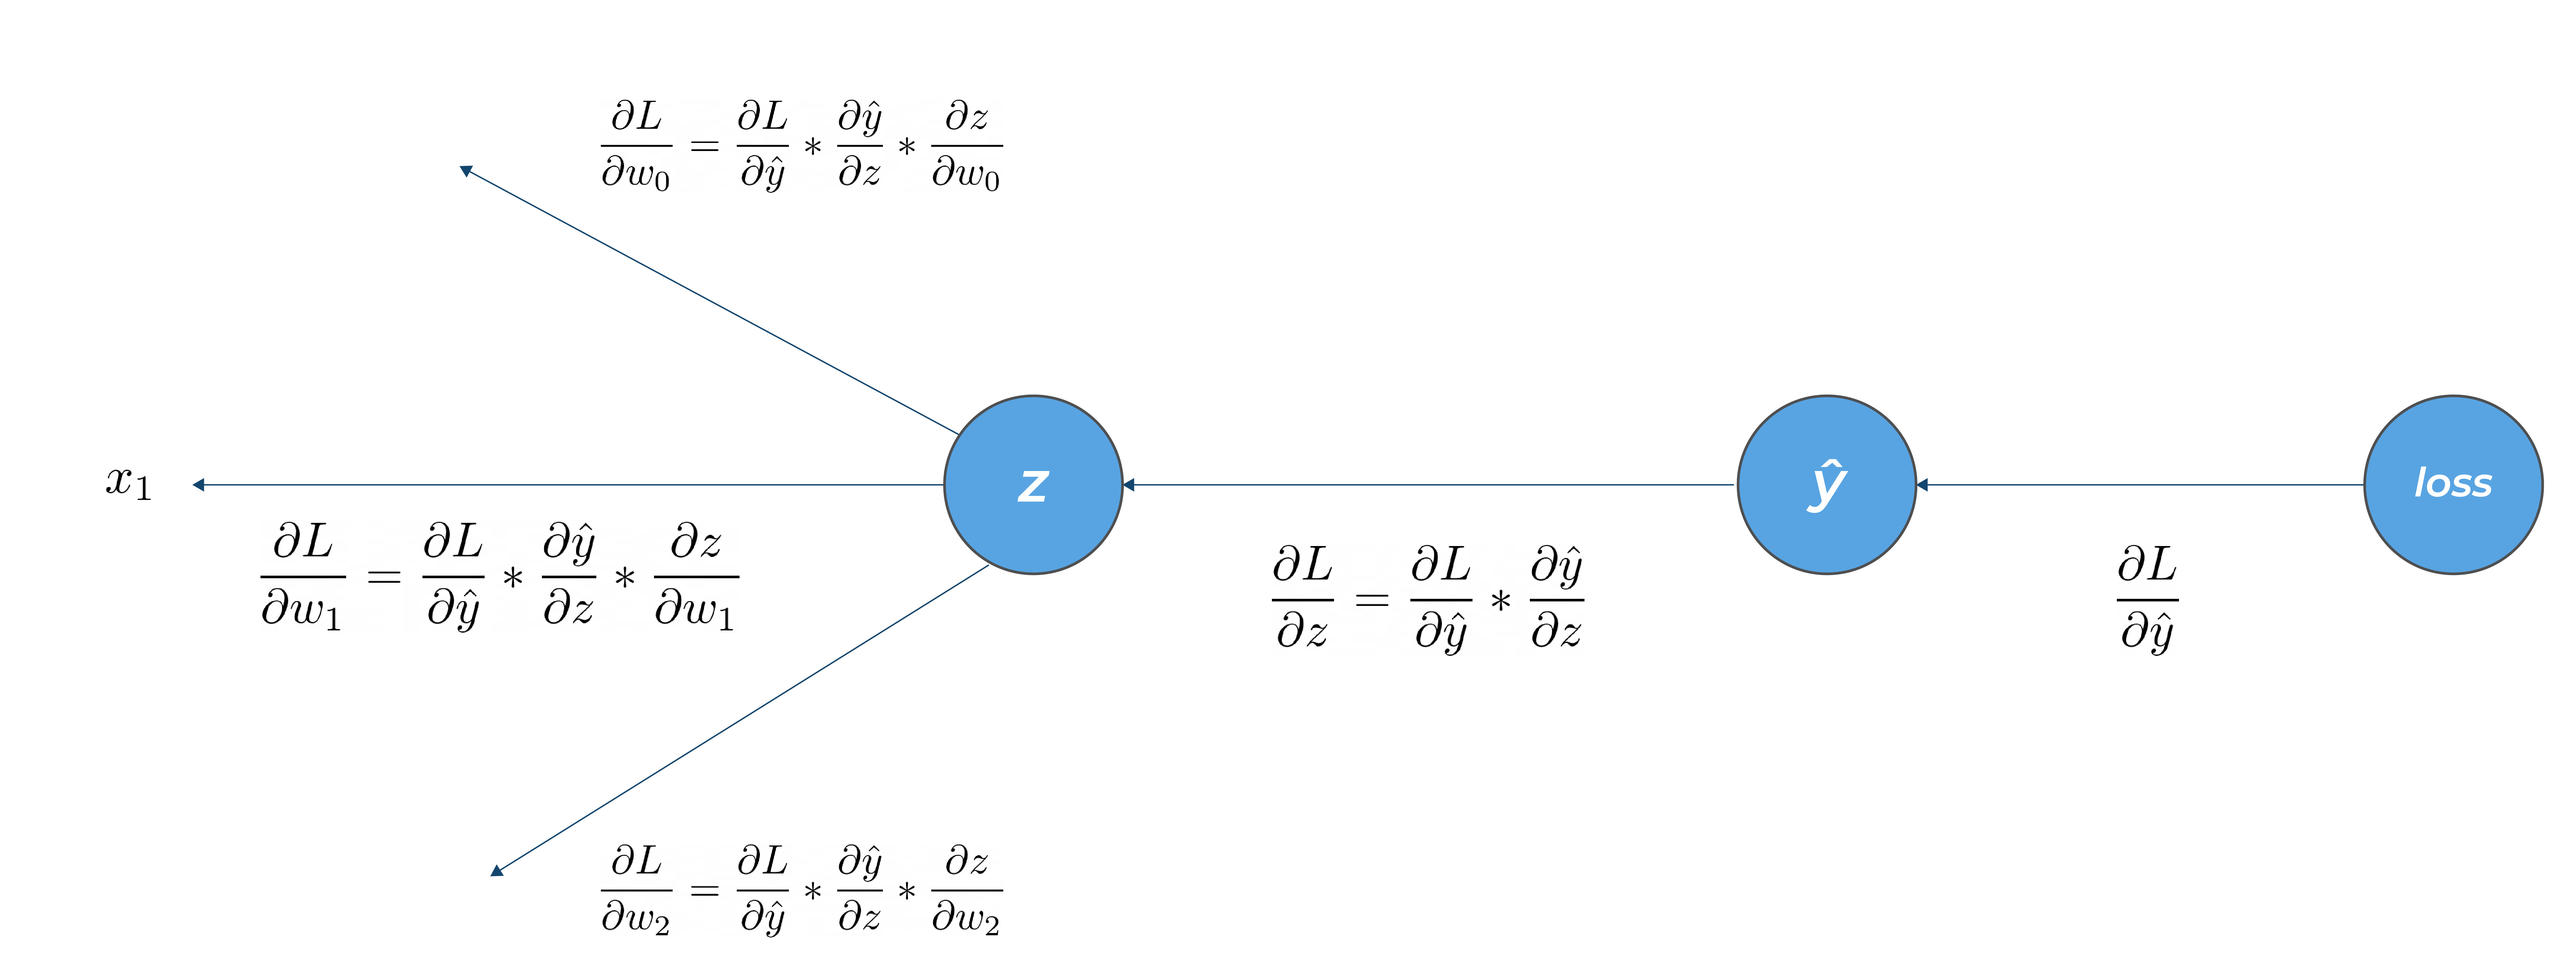</p>
</div>

Now, we have to find the local gradients $\frac{\partial{L}}{\partial{\hat{y}}}$,$\frac{\partial{\hat{y}}}{\partial{z}}$,$\frac{\partial{z}}{\partial{w_0}}$,  $\frac{\partial{z}}{\partial{w_1}}$ and  $\frac{\partial{z}}{\partial{w_2}}$

$$\frac{\partial{L}}{\partial{\hat{y}}}=\frac{\partial{-(y\log{\hat{y}}+(1-y)\log{(1-\hat{y})})}}{\partial{\hat{y}}}$$
$$\frac{\partial{L}}{\partial{\hat{y}}}=-(\frac{y}{\hat{y}}-\frac{(1-y)}{(1-\hat{y})})$$

for $\frac{\partial{\hat{y}}}{\partial{z}}$, we know $\hat{y}=\frac{1}{1+e^{-z}}$
$$\frac{\partial{\hat{y}}}{\partial{z}}=\frac{\partial({\frac{1}{1+e^{-z}}})}{\partial{z}}$$
$$\frac{\partial{\hat{y}}}{\partial{z}}=\frac{(1+e^{-z})*\frac{\partial{(1)}}{\partial{z}}-\frac{\partial{(1+e^{-z})}}{\partial{z}}*1}{(1+e^{-z})^2}$$

$$\frac{\partial{\hat{y}}}{\partial{z}}=\frac{0-(-e^{-z})}{(1+e^{-z})^2}$$

$$\frac{\partial{\hat{y}}}{\partial{z}}=\frac{e^{-z}}{(1+e^{-z})^2}$$

$$\frac{\partial{\hat{y}}}{\partial{z}}=\frac{1}{(1+e^{-z})}*\frac{e^{-z}}{(1+e^{-z})}$$

$$\frac{\partial{\hat{y}}}{\partial{z}}=\hat{y}*(1-\frac{1}{(1+e^{-z})})$$

$$\frac{\partial{\hat{y}}}{\partial{z}}=\hat{y}*(1-\hat{y})$$

for $\frac{\partial{z}}{\partial{w_0}}$,
$$\frac{\partial{z}}{\partial{w_0}}=\frac{\partial{(w_0+x_1*w_1+x_2*w_2)}}{\partial{w_0}}$$

$$\frac{\partial{z}}{\partial{w_0}}=1$$

Similarly, $\frac{\partial{z}}{\partial{w_1}}=x_1$ and $\frac{\partial{z}}{\partial{w_2}}=x_2$

Finally, using chain rule as described above, we get
$$\therefore\frac{\partial{L}}{\partial{\hat{y}}}=-(\frac{y}{\hat{y}}-\frac{(1-y)}{(1-\hat{y})})$$

$$\therefore\frac{\partial{L}}{\partial{z}}=\frac{\partial{L}}{\partial{\hat{y}}}*\frac{\partial{\hat{y}}}{\partial{z}}=-(\frac{y}{\hat{y}}-\frac{(1-y)}{(1-\hat{y})})*\hat{y}*(1-\hat{y})$$


$$\therefore\frac{\partial{L}}{\partial{w_0}}=\frac{\partial{L}}{\partial{\hat{y}}}*\frac{\partial{\hat{y}}}{\partial{z}}*\frac{\partial{z}}{\partial{w_0}}=-(\frac{y}{\hat{y}}-\frac{(1-y)}{(1-\hat{y})})*\hat{y}(1-\hat{y})*1$$

$$\therefore\frac{\partial{L}}{\partial{w_1}}=\frac{\partial{L}}{\partial{\hat{y}}}*\frac{\partial{\hat{y}}}{\partial{z}}*\frac{\partial{z}}{\partial{w_1}}=-(\frac{y}{\hat{y}}-\frac{(1-y)}{(1-\hat{y})})*\hat{y}(1-\hat{y})*x_1$$

$$\therefore \frac{\partial{L}}{\partial{w_2}}=\frac{\partial{L}}{\partial{\hat{y}}}*\frac{\partial{\hat{y}}}{\partial{z}}*\frac{\partial{z}}{\partial{w_2}}=-(\frac{y}{\hat{y}}-\frac{(1-y)}{(1-\hat{y})})*\hat{y}(1-\hat{y})*x_2$$








## Weight update

Our main objective of backpropagation is to update learnable parameters of the network, i.e the weights.

Now, we update the weights as follows:

$new \space w = old \space w + \Delta w = old \space w + \eta (- \frac{\partial L}{\partial w})$ 

where, $\eta$ is the learning rate.

For example,

$$new \space w_0 = old \space w_0 + \Delta w_0 = old \space w_0 + \eta (- \frac{\partial L}{\partial w_0})$$
$$new \space w_1 = old \space w_1 + \Delta w_1 = old \space w_1 + \eta (- \frac{\partial L}{\partial w_1})$$

$$new \space w_2 = old \space w_2 + \Delta w_2 = old \space w_2 + \eta (- \frac{\partial L}{\partial w_2})$$






In [33]:
import numpy as np

class MLP:
    def __init__(self, input_size, hidden_size, output_size):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size

        # Initialize weights with random values
        self.W1 = np.random.randn(input_size, hidden_size)
        self.W2 = np.random.randn(hidden_size, output_size)

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        return x * (1 - x)

    def forward(self, X):
        self.hidden_layer = self.sigmoid(np.dot(X, self.W1))
        self.output_layer = self.sigmoid(np.dot(self.hidden_layer, self.W2))

    def backward(self, X, y, lr):
        # Calculate the gradients
        output_error = y - self.output_layer
        output_delta = output_error * self.sigmoid_derivative(self.output_layer)
        hidden_error = output_delta.dot(self.W2.T)
        hidden_delta = hidden_error * self.sigmoid_derivative(self.hidden_layer)

        # Update the weights
        self.W2 -= self.hidden_layer.T.dot(output_delta) * lr
        self.W1 -= X.T.dot(hidden_delta) * lr

    def train(self, X, y, epochs=1000, lr=0.01):
        for epoch in range(epochs):
            self.forward(X)
            self.backward(X, y, lr)

    def predict(self, X):
        self.forward(X)
        return self.output_layer

In [34]:
X = np.array([
    [0,0], [0,1], [1,0],[1,1]
])
y = np.array([[0],[1],[1],[0]])
X, y

(array([[0, 0],
        [0, 1],
        [1, 0],
        [1, 1]]),
 array([[0],
        [1],
        [1],
        [0]]))

In [35]:
mlp = MLP(input_size=2, hidden_size=4, output_size=1)

In [36]:
mlp.train(X,y, epochs=10000, lr=0.1)

In [37]:
mlp.predict(X)

array([[0.99980682],
       [0.99999352],
       [0.99995932],
       [0.99999676]])